In [1]:
import cv2                   # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.
import random


In [2]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output



In [72]:
img_in = cv2.imread('br2.jpg',0)

img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)

g1 = np.zeros (img_in.shape, img_in.dtype)
g2 = np.zeros (img_in.shape, img_in.dtype)
g3 = np.zeros (img_in.shape, img_in.dtype)

g= img_in
im1= cv2.intensity_transform.contrastStretching(img_in,g1,0,255,255,0)
im2= cv2.intensity_transform.contrastStretching(img_in,g2,10,100,0,10)
im3= cv2.intensity_transform.gammaCorrection(img_in,g3,16)




Text(0.5, 1.0, 'gammaCorrection: 16')

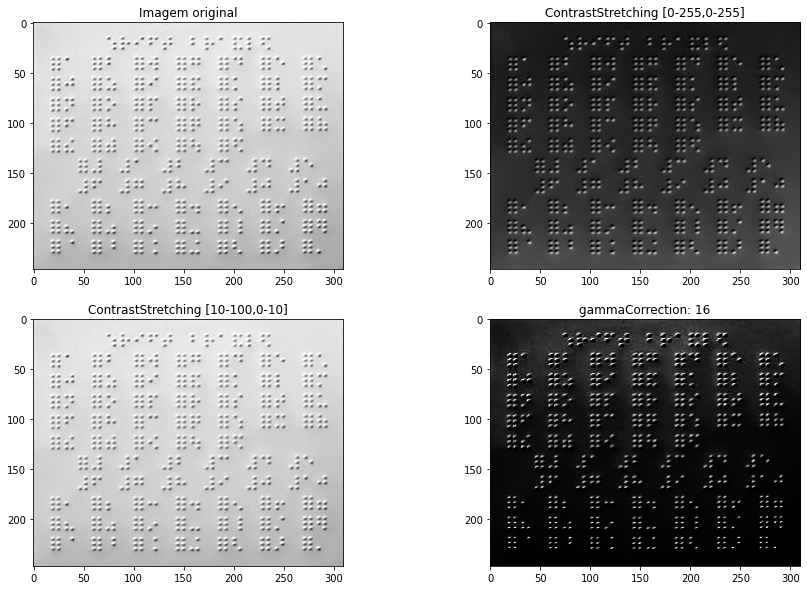

In [73]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axs[0,0].imshow(g)
axs[0,0].set_title("Imagem original", size=12)
axs[0,1].imshow(g1)
axs[0,1].set_title("ContrastStretching [0-255,0-255]",size=12)
axs[1,0].imshow(g2)
axs[1,0].set_title("ContrastStretching [10-100,0-10]",size=12)
axs[1,1].imshow(g3)
axs[1,1].set_title("gammaCorrection: 16",size=12)

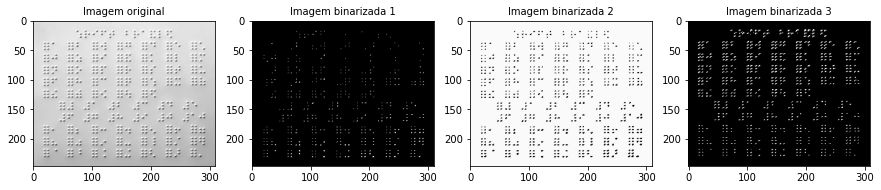

In [80]:

#Fazendo binarização da imagem de entrada (recebida em tons de cinza)

th, im_th = cv2.threshold(g1, 160, 250, cv2.THRESH_BINARY)

th, im_th2 = cv2.threshold(g, 145, 250, cv2.THRESH_BINARY)

th, im_th3 = cv2.threshold(g3, 110, 255, cv2.THRESH_BINARY)

figure, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 15))
axs[0].set_title("Imagem original", size = 10)
axs[0].imshow(img_in)
axs[1].set_title("Imagem binarizada 1", size = 10)
axs[1].imshow(im_th)
axs[2].set_title("Imagem binarizada 2", size = 10)
axs[2].imshow(im_th2)
axs[3].set_title("Imagem binarizada 3", size = 10)
axs[3].imshow(im_th3)

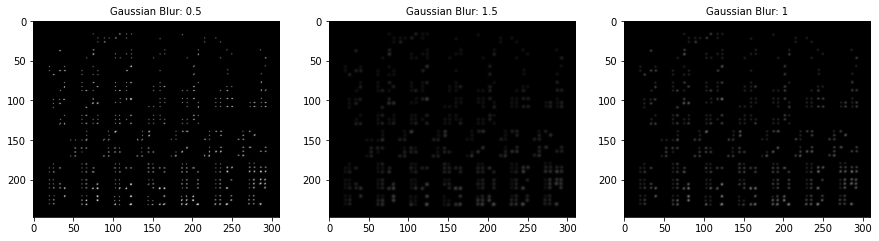

In [75]:
#Piorando imagens para maior aguçamento na classificação
nsize=21
size = (nsize,nsize)


im_out1 = cv2.GaussianBlur(im_th, size, 0.5)
im_out2 = cv2.GaussianBlur(im_th, size, 1.5)
im_out3 = cv2.GaussianBlur(im_th, size, 1)

figure, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 10))
axs[0].set_title("Gaussian Blur: 0.5",fontsize= 10)
axs[0].imshow(im_out1,vmin=im_out1.min(),vmax=im_out1.max())
axs[1].set_title("Gaussian Blur: 1.5",fontsize= 10)
axs[1].imshow(im_out2,vmin=im_out2.min(),vmax=im_out2.max())
axs[2].set_title("Gaussian Blur: 1",fontsize= 10)
axs[2].imshow(im_out3,vmin=im_out3.min(),vmax=im_out3.max())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


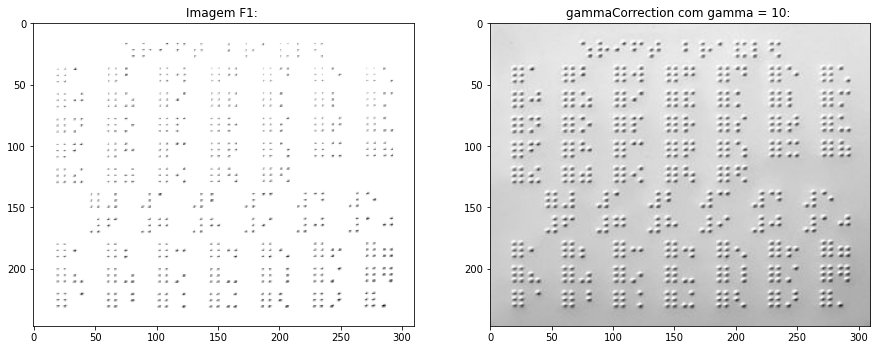

In [76]:
#Piorando imagens para maior aguçamento na classificação
f = img_in


F1 = f.astype(np.int32)
F2 = f.astype(np.int32)

F1=2*F1-40

img_tranformada = cv2.intensity_transform.gammaCorrection(f,F2,10)

figure, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 10))
axs[0].set_title("Imagem F1: ",size =12)
axs[0].imshow(F1,vmin=F1.min(),vmax=F1.max())
axs[1].set_title("gammaCorrection com gamma = 10: ",size =12)
axs[1].imshow(F2,vmin=F2.min(),vmax=F2.max())
